# NLP Project

# Objective

To predict the language that the 

In [1]:
import pandas as pd
import numpy as np

from requests import get
from bs4 import BeautifulSoup
import os

import seaborn as sns
import matplotlib.pyplot as plt

import prepare

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import nltk.sentiment
import re

import time



In [2]:
df = pd.read_json("data.json")

In [3]:
df.language.value_counts()

JavaScript          73
Python              27
Java                20
TypeScript          17
Go                  12
C++                 12
C                    6
Swift                5
Vue                  4
PHP                  4
Shell                4
HTML                 4
Rust                 4
CSS                  3
Ruby                 3
Kotlin               3
Dart                 2
Clojure              2
Jupyter Notebook     2
Objective-C          2
Assembly             1
OCaml                1
Emacs Lisp           1
Haskell              1
TeX                  1
C#                   1
Name: language, dtype: int64

In [4]:
(df.language.isnull()).sum()

33

In [5]:
df[df.readme_contents.str.contains("<p")]

,repo,language,readme_contents
0,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ..."
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
4,sindresorhus/awesome,None,"<div align=""center"">\n\t<img width=""500"" heigh..."
7,ohmyzsh/ohmyzsh,Shell,"<p align=""center"">\n <img src=""https://s3.ama..."
8,kamranahmedse/developer-roadmap,None,\n![Web Developer Roadmap - 2020](https://i.im...
...,...,...,...
211,ZuzooVn/machine-learning-for-software-engineers,None,# Parcours d'Apprentissage de A à Z: Le Machin...
216,tailwindcss/tailwindcss,CSS,"<p>\n <a href=""https://tailwindcss.com/"" ta..."
223,markedjs/marked,JavaScript,"<a href=""https://marked.js.org"">\n <img width..."
230,nsqio/nsq,Go,"<p align=""center"">\n<img align=""left"" width=""1..."


# Acquire

Thanks to Zach, we already have the main function to acquire the data. The script runs through a list of repo's, and creates a new json file with the name of the repo, the programing language used, and the readme_contents.

In [6]:
df.head()

,repo,language,readme_contents
0,vuejs/vue,JavaScript,"<p align=""center""><a href=""https://vuejs.org"" ..."
1,EbookFoundation/free-programming-books,None,This page is available as an easy-to-read webs...
2,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www...."
3,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
4,sindresorhus/awesome,None,"<div align=""center"">\n\t<img width=""500"" heigh..."


Now, we need to build a webscrapping function that can help us get more repo names, so we can run the script, and get their information. Our goal is to get 300 README's.

In [7]:
url = 'https://github.com/search?q=stars%3A%3E0&s=stars&type=Repositories'
headers = {'User-Agent': 'Codeup Bayes Data Science'} # codeup.com doesn't like our default user-agent
response = get(url, headers=headers)

In [8]:
soup = BeautifulSoup(response.content, 'html.parser')

In [9]:
article = soup.find_all('a', class_='v-align-middle')

In [474]:
# article

In [11]:
article[0]["href"].replace("/", '', 1)

'freeCodeCamp/freeCodeCamp'

## Web Scrapping Function

In [482]:
repo_test = pd.read_csv("repo_names.csv")
repo_test.shape

(490, 2)

In [ ]:
repo_names = []

# Loop to get repo names
for page_number in range(1,80):
    url = f"https://github.com/search?p={page_number}&q=stars%3A%3E0&s=stars&type=Repositories"
    headers = {'User-Agent': 'Codeup Bayes Data Science'}
    response = get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    repos = soup.find_all('a', class_='v-align-middle')
    time.sleep(20)

    
    for repo_number in range(len(repos)):
        repo_name = repos[repo_number]["href"].replace("/", '', 1)
        repo_names.append(repo_name)


In [ ]:
# s = pd.DataFrame(repo_names, columns=["repo_name"])

# s.to_csv("repo_names.csv")

# # Update existing csv file with most up to date list
# s = pd.DataFrame(repo_names, columns=["repo_name"])
# s.to_csv("repo_names.csv", mode='a', header=True)
# repo_test = pd.read_csv("repo_names.csv")
# repo_list = repo_test.repo_name.fillna(repo_test["0"])
# repo_list.to_csv("repo_names.csv")

In [ ]:
REPOs = ['freeCodeCamp/freeCodeCamp', '996icu/996.ICU', 'vuejs/vue',
       'EbookFoundation/free-programming-books', 'facebook/react',
       'tensorflow/tensorflow', 'twbs/bootstrap', 'sindresorhus/awesome',
       'getify/You-Dont-Know-JS', 'jwasham/coding-interview-university',
       'ohmyzsh/ohmyzsh', 'kamranahmedse/developer-roadmap',
       'github/gitignore', 'CyC2018/CS-Notes',
       'donnemartin/system-design-primer', 'microsoft/vscode',
       'airbnb/javascript', 'flutter/flutter', 'd3/d3', 'torvalds/linux',
       'facebook/react-native', 'jackfrued/Python-100-Days',
       'public-apis/public-apis', 'electron/electron',
       'vinta/awesome-python', 'Snailclimb/JavaGuide',
       'facebook/create-react-app', 'jlevy/the-art-of-command-line',
       'TheAlgorithms/Python', 'danistefanovic/build-your-own-x',
       'axios/axios', 'golang/go', 'trekhleb/javascript-algorithms',
       'nodejs/node', 'justjavac/free-programming-books-zh_CN',
       'ytdl-org/youtube-dl', 'animate-css/animate.css',
       'kubernetes/kubernetes', 'tensorflow/models', 'microsoft/terminal',
       'iluwatar/java-design-patterns', 'mui-org/material-ui',
       'moby/moby', '30-seconds/30-seconds-of-code',
       'PanJiaChen/vue-element-admin', 'MisterBooo/LeetCodeAnimation',
       'avelino/awesome-go', 'vuejs/awesome-vue', 'webpack/webpack',
       'jquery/jquery', 'spring-projects/spring-boot',
       'Semantic-Org/Semantic-UI', 'tonsky/FiraCode',
       'typicode/json-server', 'netdata/netdata', 'jakubroztocil/httpie',
       'rails/rails', 'xingshaocheng/architect-awesome',
       'goldbergyoni/nodebestpractices', 'ElemeFE/element',
       'h5bp/html5-boilerplate', 'opencv/opencv', 'lodash/lodash',
       'awesome-selfhosted/awesome-selfhosted',
       'josephmisiti/awesome-machine-learning', 'kdn251/interviews',
       'gatsbyjs/gatsby', 'h5bp/Front-end-Developer-Interview-Questions',
       'gohugoio/hugo', 'moment/moment', 'doocs/advanced-java',
       'bitcoin/bitcoin', 'ansible/ansible', 'antirez/redis',
       'yangshun/tech-interview-handbook', 'ReactiveX/RxJava',
       'labuladong/fucking-algorithm', 'nvm-sh/nvm',
       'resume/resume.github.com', 'ionic-team/ionic',
       'scikit-learn/scikit-learn', 'papers-we-love/papers-we-love',
       'ReactTraining/react-router', 'thedaviddias/Front-End-Checklist',
       'jekyll/jekyll', 'google/material-design-icons', 'jgthms/bulma',
       'awesomedata/awesome-public-datasets', 'pytorch/pytorch',
       'psf/requests', 'gothinkster/realworld',
       'protocolbuffers/protobuf', 'meteor/meteor',
       'mtdvio/every-programmer-should-know', 'kelseyhightower/nocode',
       'apache/incubator-echarts', 'necolas/normalize.css',
       'gin-gonic/gin', 'yarnpkg/yarn',
       'scutan90/DeepLearning-500-questions',
       'wasabeef/awesome-android-ui', 'jaywcjlove/awesome-mac',
       'NARKOZ/hacker-scripts', 'Dogfalo/materialize', 'google/guava',
       'aymericdamien/TensorFlow-Examples',
       'spring-projects/spring-framework',
       'minimaxir/big-list-of-naughty-strings', 'scrapy/scrapy',
       'Hack-with-Github/Awesome-Hacking', 'square/okhttp',
       'enaqx/awesome-react', 'neovim/neovim', 'nwjs/nw.js',
       'FreeCodeCampChina/freecodecamp.cn', 'babel/babel',
       'prettier/prettier', 'android/architecture-samples',
       'fatedier/frp', 'ryanmcdermott/clean-code-javascript',
       'serverless/serverless', 'sindresorhus/awesome-nodejs',
       'parcel-bundler/parcel', 'square/retrofit', 'impress/impress.js',
       'juliangarnier/anime', 'ripienaar/free-for-dev', 'grafana/grafana',
       'macrozheng/mall', 'nodejs/node-v0.x-archive', 'x64dbg/x64dbg',
       'ziishaned/learn-regex', 'vsouza/awesome-ios',
       'astaxie/build-web-application-with-golang', 'ColorlibHQ/AdminLTE',
       'tesseract-ocr/tesseract', 'gogs/gogs',
       'ageitgey/face_recognition',
       'MaximAbramchuck/awesome-interview-questions', 'sveltejs/svelte',
       'TryGhost/Ghost', 'k88hudson/git-flight-rules',
       'Alamofire/Alamofire', 'home-assistant/core',
       'prakhar1989/awesome-courses', 'vercel/hyper',
       'bailicangdu/vue2-elm', 'soimort/you-get',
       'tuvtran/project-based-learning', 'azl397985856/leetcode',
       'AFNetworking/AFNetworking', 'git/git', 'syncthing/syncthing',
       'adobe/brackets', 'Genymobile/scrcpy', 'etcd-io/etcd',
       'facebook/jest', 'prometheus/prometheus', 'karan/Projects',
       'mozilla/pdf.js', 'PhilJay/MPAndroidChart', 'discourse/discourse',
       'google/material-design-lite', 'justjavac/awesome-wechat-weapp',
       'python/cpython', 'godotengine/godot', '521xueweihan/HelloGitHub',
       'blueimp/jQuery-File-Upload', 'deepfakes/faceswap', 'hexojs/hexo',
       'BVLC/caffe', 'mermaid-js/mermaid', 'xitu/gold-miner',
       'preactjs/preact', 'grpc/grpc', 'open-guides/og-aws',
       'floodsung/Deep-Learning-Papers-Reading-Roadmap', 'apache/spark',
       'alex/what-happens-when', 'binhnguyennus/awesome-scalability',
       'ethereum/go-ethereum', 'Kong/kong',
       'kamranahmedse/design-patterns-for-humans',
       'DefinitelyTyped/DefinitelyTyped', 'Solido/awesome-flutter',
       'huggingface/transformers', 'Leaflet/Leaflet',
       'shadowsocks/ShadowsocksX-NG', 'Homebrew/legacy-homebrew',
       'jashkenas/backbone', 'ariya/phantomjs', 'lukehoban/es6features',
       'Avik-Jain/100-Days-Of-ML-Code',
       'exacity/deeplearningbook-chinese', 'zenorocha/clipboard.js',
       'foundation/foundation-sites', 'huginn/huginn', 'videojs/video.js',
       'testerSunshine/12306', 'JuliaLang/julia', 'nuxt/nuxt.js',
       'isocpp/CppCoreGuidelines', 'RocketChat/Rocket.Chat',
       'certbot/certbot', 'codepath/android_guides', 'quilljs/quill',
       'tastejs/todomvc', 'bilibili/ijkplayer', 'caolan/async',
       'bayandin/awesome-awesomeness', 'vuetifyjs/vuetify',
       'fffaraz/awesome-cpp', 'mathiasbynens/dotfiles', 'symfony/symfony',
       'facebookresearch/Detectron', 'google-research/bert',
       'pi-hole/pi-hole', 'freeCodeCamp/devdocs', 'fxsjy/jieba',
       'istio/istio', 'raywenderlich/swift-algorithm-club',
       'alacritty/alacritty', 'JakeWharton/butterknife',
       'ant-design/ant-design-pro',
       'shengxinjing/programmer-job-blacklist', 'apachecn/AiLearning',
       'pandas-dev/pandas', 'danielmiessler/SecLists',
       'aosabook/500lines', 'getsentry/sentry', 'faif/python-patterns',
       'akullpp/awesome-java', 'square/leakcanary',
       'crossoverJie/JCSprout', 'localstack/localstack', 'wg/wrk',
       'request/request', 'Tencent/weui', 'dylanaraps/pure-bash-bible',
       'nylas/nylas-mail', 'google/styleguide', 'select2/select2',
       'Modernizr/Modernizr', 'carbon-app/carbon', 'FiloSottile/mkcert',
       'madewithml/basics', 'yangshun/front-end-interview-handbook',
       'ngosang/trackerslist', 'johnpapa/angular-styleguide',
       'Alvin9999/new-pac', 'houshanren/hangzhou_house_knowledge',
       'astaxie/beego', 'fzaninotto/Faker', 'nvie/gitflow', 'iina/iina',
       'vuejs/vuex', 'nolimits4web/swiper', 'standard/standard',
       'ZuzooVn/machine-learning-for-software-engineers',
       'jakevdp/PythonDataScienceHandbook', 'Marak/faker.js',
       'pingcap/tidb', 'netty/netty', 'ziadoz/awesome-php',
       'rethinkdb/rethinkdb', 'github/fetch', 'tailwindcss/tailwindcss',
       'dkhamsing/open-source-ios-apps',
       'herrbischoff/awesome-macos-command-line', 'jiahaog/nativefier',
       'angular/angular-cli', 'alibaba/fastjson', 'florinpop17/app-ideas',
       'ajaxorg/ace', 'naptha/tesseract.js', 'emberjs/ember.js',
       'kelseyhightower/kubernetes-the-hard-way', 'agalwood/Motrix',
       'Polymer/polymer', 'alibaba/arthas', 'hammerjs/hammer.js',
       'Automattic/mongoose', 'openai/gym', 'fighting41love/funNLP',
       'pure-css/pure', 'heartcombo/devise', 'google/leveldb',
       'fouber/blog', 'satwikkansal/wtfpython', 't4t5/sweetalert',
       'facebook/flow', 'Homebrew/brew', 'unknwon/the-way-to-go_ZH_CN',
       'gitlabhq/gitlabhq', 'hashicorp/terraform', 'harvesthq/chosen',
       'minio/minio', 'ReactiveX/rxjs', 'cheeriojs/cheerio',
       'sequelize/sequelize', 'dcloudio/uni-app', 'webtorrent/webtorrent',
       'mobxjs/mobx', 'remy/nodemon', 'niklasvh/html2canvas',
       'rapid7/metasploit-framework', 'akveo/ngx-admin',
       'cypress-io/cypress', 'redux-saga/redux-saga', 'pypa/pipenv',
       'littlecodersh/ItChat', 'balderdashy/sails',
       'scwang90/SmartRefreshLayout',
       'terryum/awesome-deep-learning-papers', 'tootsuite/mastodon',
       'alibaba/flutter-go', 'drone/drone', 'StreisandEffect/streisand',
       'eugenp/tutorials', 'ocornut/imgui',
       'NationalSecurityAgency/ghidra', 'rstacruz/nprogress',
       'ctripcorp/apollo', 'wagoodman/dive', 'microsoft/monaco-editor',
       'SortableJS/Sortable', 'koalaman/shellcheck',
       'FezVrasta/bootstrap-material-design', 'JedWatson/react-select',
       'aria2/aria2', 'kriasoft/react-starter-kit', 'syl20bnr/spacemacs',
       'CymChad/BaseRecyclerViewAdapterHelper', 'gorhill/uBlock',
       'SwiftGGTeam/the-swift-programming-language-in-chinese',
       'powerline/fonts', 'byoungd/English-level-up-tips-for-Chinese',
       'mochajs/mocha', 'guzzle/guzzle', 'typeorm/typeorm',
       'markerikson/react-redux-links', 'BradLarson/GPUImage',
       'hashicorp/consul', 'usablica/intro.js', 'dhg/Skeleton',
       'ruanyf/jstraining', 'parse-community/parse-server',
       'Seldaek/monolog', 'jaredhanson/passport', 'd2l-ai/d2l-zh',
       'CMU-Perceptual-Computing-Lab/openpose', 'vuejs/vue-devtools',
       'keon/algorithms', 'jorgebucaran/hyperapp', 'docker/compose',
       'github/hub', 'obsproject/obs-studio', 'airbnb/lottie-ios',
       'SwiftyJSON/SwiftyJSON', 'railsware/upterm',
       'PowerShell/PowerShell', 'pyenv/pyenv', 'hankcs/HanLP',
       'reduxjs/react-redux', 'pcottle/learnGitBranching',
       'bcit-ci/CodeIgniter', 'fastai/fastai', 'mongodb/mongo',
       'tj/commander.js', 'avajs/ava', 'google/gson',
       'veggiemonk/awesome-docker', 'xi-editor/xi-editor',
       'balena-io/etcher', 'mqyqingfeng/Blog', 'doczjs/docz',
       'nlohmann/json', 'inconshreveable/ngrok', 'jinzhu/gorm',
       'NativeScript/NativeScript', 'google/web-starter-kit',
       'donnemartin/data-science-ipython-notebooks', 'ReactiveX/RxSwift',
       'postcss/autoprefixer']

# Prepare

In [209]:
df = prepare.prep_readme_data(df)

In [210]:
df = df[(~df.readme_contents.str.contains("<p ")) & (~df.readme_contents.str.contains("<div "))].dropna()

df.loc[(df.language != "Python") & (df.language !="Java") & (df.language !="JavaScript") & (df.language !="C++"), 'is_top_language'] = 'other'

df.is_top_language = df.is_top_language.fillna(df.language)

In [85]:
df

,repo,language,readme_contents,clean_tokes,clean_lemmatized,is_top_language
13,airbnb/javascript,JavaScript,# Airbnb JavaScript Style Guide() {\n\n*A most...,"[airbnb, javascript, style, guide, a, mostly, ...",airbnb javascript style guide mostly reasonabl...,JavaScript
14,flutter/flutter,Dart,# [![Flutter logo][]][flutter.dev]\n\n[![Build...,"[flutter, logoflutterdev, build, status, cirru...",flutter logoflutterdev build status cirrusbuil...,other
15,d3/d3,JavaScript,"# D3: Data-Driven Documents\n\n<a href=""https:...","[d3, datadriven, documents, a, hrefhttpsd3jsor...",d3 datadriven document hrefhttpsd3jsorgimg src...,JavaScript
16,torvalds/linux,C,Linux kernel\n============\n\nThere are severa...,"[linux, kernel, there, are, several, guides, f...",linux kernel several guide kernel developer us...,other
18,jackfrued/Python-100-Days,Jupyter Notebook,## Python - 100天从新手到大师\n\n> **作者**：骆昊\n>\n> **...,"[python, 100, 8w15pythoncore50courseshttpsgith...",python 100 8w15pythoncore50courseshttpsgithubc...,other
...,...,...,...,...,...,...
243,lodash/lodash,JavaScript,# lodash\n\n[Site](https://lodash.com/) |\n[Do...,"[lodash, sitehttpslodashcom, docshttpslodashco...",lodash sitehttpslodashcom docshttpslodashcomdo...,JavaScript
244,josephmisiti/awesome-machine-learning,Python,# Awesome Machine Learning [![Awesome](https:/...,"[awesome, machine, learning, awesomehttpscdnra...",awesome machine learning awesomehttpscdnrawgit...,Python
245,kdn251/interviews,Java,> * 原文地址：[github.com/kdn251/interviews](https:...,[githubcomkdn251interviewshttpsgithubcomkdn251...,githubcomkdn251interviewshttpsgithubcomkdn251i...,Java
246,h5bp/Front-end-Developer-Interview-Questions,HTML,# Front-end Job Interview Questions\n\nThis re...,"[frontend, job, interview, questions, this, re...",frontend job interview question repository con...,other


# Explore

Text(0, 0.5, 'Programming Language')

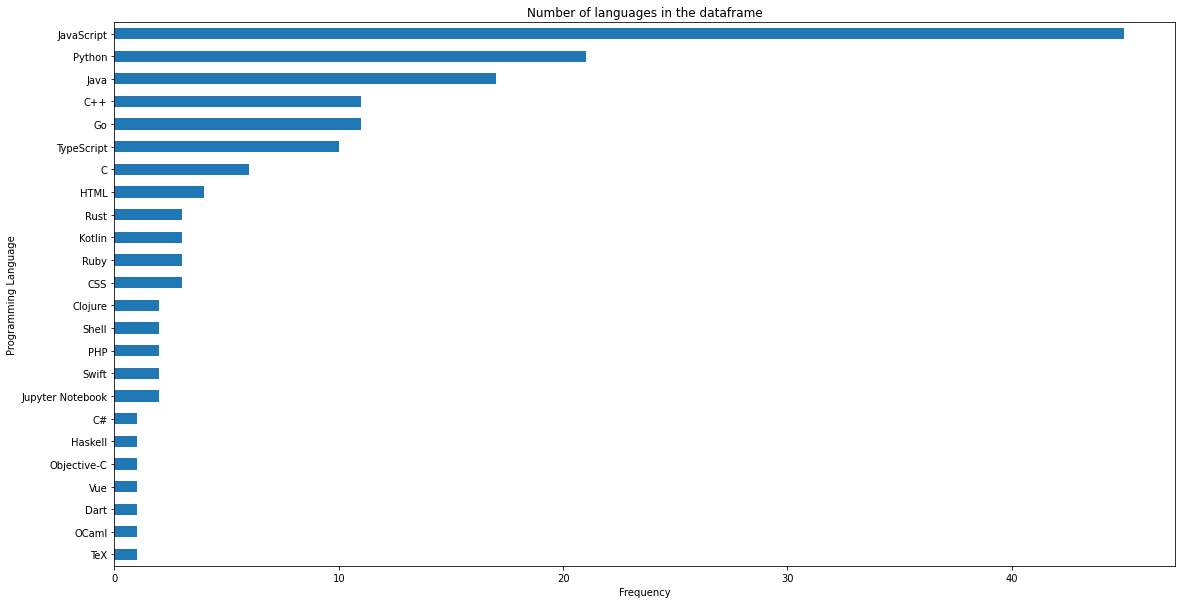

In [15]:
df.language.value_counts().sort_values(ascending=True).plot.barh(figsize=(19,10))
plt.title("Number of languages in the dataframe")
plt.xlabel("Frequency")
plt.ylabel("Programming Language")

## What are the most common words in READMEs?

In [170]:
def most_frequent_word(s: pd.Series) -> str:
    # your code might be more or less complicated here, depending on how much
    # text prep you've already done or more you want to do in this function
    words = clean(' '.join(s))
    most_common_word = pd.Series(words).value_counts().head(1).index
    return most_common_word

In [16]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [171]:
df.groupby("is_top_language").clean_lemmatized.agg(["count", most_frequent_word])

,count,most_frequent_word
is_top_language,,
C++,11,build
Java,17,c
JavaScript,45,javascript
Python,21,yes
other,60,9


In [55]:
all_words = clean(' '.join(df.clean_lemmatized))
python_words = clean(' '.join(df[df.language == 'Python'].clean_lemmatized))
javascript_words = clean(' '.join(df[df.language == 'JavaScript'].clean_lemmatized))
java_words = clean(' '.join(df[df.language == 'Java'].clean_lemmatized))
c_plus_plus_words = clean(' '.join(df[df.language == 'C++'].clean_lemmatized))

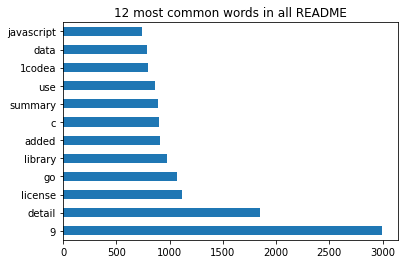

In [59]:
pd.Series(all_words).value_counts().head(12).plot.barh(title='12 most common words in all README')

In [206]:
import explore

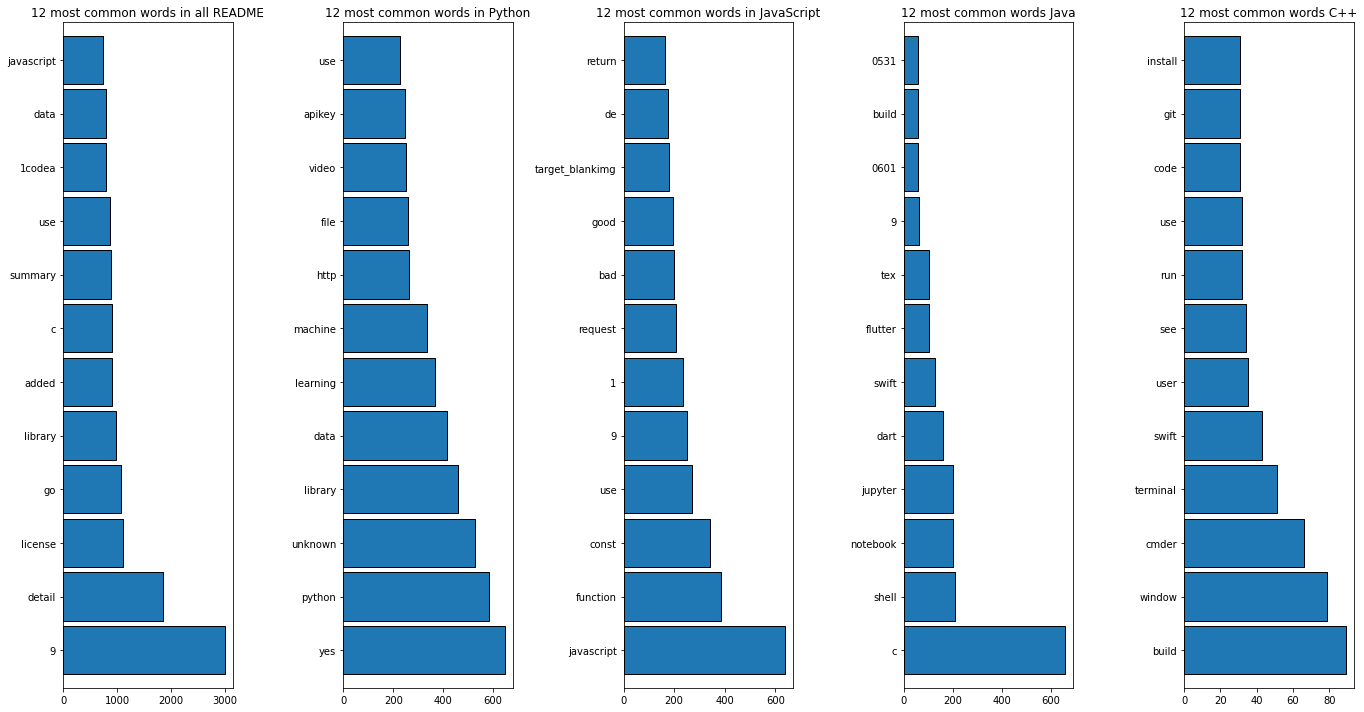

In [211]:
explore.most_common_words(df)

## What does the distribution of IDFs look like for the most common words?

In [22]:
def idf(word):
    return  df.shape[0] / (1 + (df.clean_lemmatized.str.contains(word)).sum())

In [23]:
idf("github")

1.0620689655172413

In [24]:
test = df.clean_lemmatized.to_dict()

In [29]:
new_words = []
for word in python_words:
    if len(word) < 10:
        new_words.append(word)

In [30]:
len(python_words[0]) < 10

True

In [31]:
# put the unique words into a data frame
idf_df = (pd.DataFrame(dict(word=python_words))
 # calculate the idf for each word 
.assign(idf=lambda df: df.word.apply(idf))
 # sort the data for presentation purposes
.set_index('word')
.sort_values(by='idf', ascending=False)
.head(5))

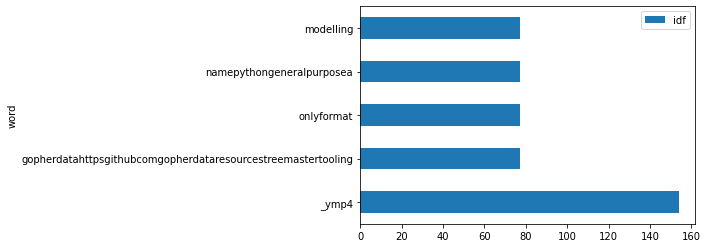

In [32]:
idf_df.plot.barh()

In [33]:
languages = df.language.value_counts().head(5).index
idf_scores = pd.DataFrame()

for language in languages:
    words = clean(' '.join(df[df.language == language].clean_lemmatized))
    # put the unique words into a data frame
    idf_df = (pd.DataFrame(dict(word=words))
     # calculate the idf for each word 
    .assign(idf=lambda df: df.word.apply(idf))
     # sort the data for presentation purposes
    .set_index('word')
    .sort_values(by='idf', ascending=False)
    .head(5))
    idf_df["language"] = language
             
    idf_scores = pd.concat([idf_df, idf_scores])
             

In [34]:
idf_scores

,idf,language
word,,
restithttpsgithubcomyookoalarestit,77.0,Go
godog,77.0,Go
gocronhttpsgithubcomrkgocron,77.0,Go
clockworkhttpsgithubcomwhiteshtefclockwork,77.0,Go
nethttphandler,77.0,Go
httpsakamsterminal,77.0,C++
profiled,77.0,C++
cmder_rootconfigprofiledbat,77.0,C++
envcmder_rootconfigprofiledps1,77.0,C++


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


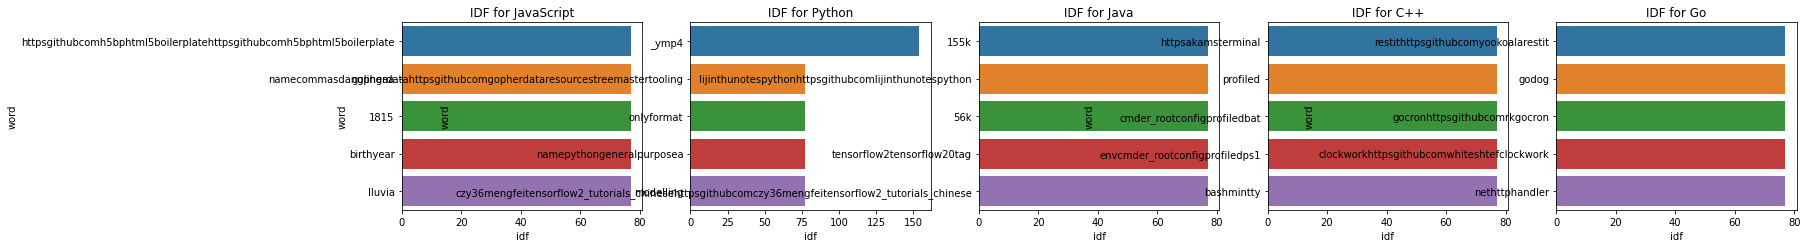

In [35]:
f = plt.figure(figsize=(25,20))

for count, language in enumerate(languages):

    f.add_subplot(5,5, count+1)
    sns.barplot(data=idf_scores[idf_scores.language == language], y=idf_scores[idf_scores.language == language].index, x="idf")
    plt.title(f"IDF for {language}")
plt.tight_layout()
plt.show()

We can see that there might be some problems with the tokenizer, which is leading to some words not being spaced out, as a result, characters are being clump together to create extra longs words, or words with no meaning. I sugest we perhaps don't use this for modeling.

# Is there a difference in the mean number of words by language?

* $H_0$: There is no significant difference between the mean word count of each language when compared with the mean word count of the group.
* $H_a$: There is a significant difference between the mean word count of each language when compared with the mean word count of the group.

$\alpha$ = 0.05

In [87]:
from scipy import stats

In [212]:
# explore.plot_word_count_distribution(df)

AttributeError: module 'explore' has no attribute 'plot_word_count_distribution'

Text(0.5, 1.0, 'Word Count Distribution')

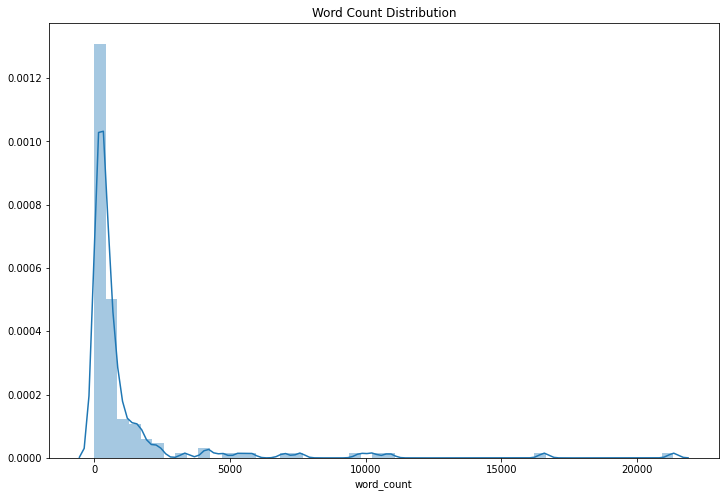

In [155]:
plt.figure(figsize=(12,8))
sns.distplot(df.word_count)
plt.title("Word Count Distribution")

It is clear that the word count is not normally distributed. The count is actually right skewed, meaning that most of the word counts by readme are below the average. There seems that there are several outliers that are skewing the data. As such, we likely won't be able to do an accurate t-test, as that requires that the data is normally distributed. 

In [152]:
mean_word_count = df.groupby("is_top_language").word_count.mean()
mean_word_count

is_top_language
C++            513.363636
Java          1006.235294
JavaScript     807.666667
Python        2093.285714
other         1321.033333
Name: word_count, dtype: float64

In [151]:
languages = df.is_top_language.unique()
for language in languages:
    subgroup = df[df.is_top_language == language].word_count
    tsat, p = stats.ttest_1samp(subgroup, df.word_count.mean())
    print(f" The p value for {language} is {p}")

 The p value for JavaScript is 0.06317553741385247
 The p value for other is 0.7698034765500541
 The p value for Python is 0.15269716646358047
 The p value for Java is 0.7771628049886908
 The p value for C++ is 0.002288247512547638


As we can see, the only language that has a word count that is significantly different is `C++`. We can see that, on average, `C++` does have a smaller number of word per readme than the rest. However, given that the data is not normally distributed, we can't trust the results too much.

## Modeling

In [242]:
import model

from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [287]:
X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing("tf_idf", "is_top_language")
predictions = pd.DataFrame({"actual": y_train, "baseline": y_train.mode()[0]})

### Decision Tree

In [326]:
data_rep = ["bag_of_words", "tf_idf", "bag_of_ngrams"]

for i in data_rep:
    if i == "bag_of_ngrams":
        X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing("bag_of_ngrams", "is_top_language", ngram_range = (1,2))
        clf, y_pred = model.run_clf(X_train, y_train, 5)
        score = clf.score(X_train, y_train)
        print(f"{i}, score = {score}")
    else: 
        
        X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing(i, "is_top_language")
        clf, y_pred = model.run_clf(X_train, y_train, 5)
        score = clf.score(X_train, y_train)
        print(f"{i}, score = {score}")
    

bag_of_words, score = 0.7739130434782608
tf_idf, score = 0.8
bag_of_ngrams, score = 0.7739130434782608


In [325]:
X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing("tf_idf", "is_top_language")
for i in range(1, 20):
    clf, y_pred = model.run_clf(X_train, y_train, i)
    score = clf.score(X_train, y_train)
    validate_score = clf.score(X_validate, y_validate)
    print(f"Max_depth = {i}, accuracy_score = {score:.2f}. Diff = {(score - validate_score) / score:.2f}")

Max_depth = 1, accuracy_score = 0.47. Diff = 0.18
Max_depth = 2, accuracy_score = 0.58. Diff = -0.06
Max_depth = 3, accuracy_score = 0.67. Diff = 0.04
Max_depth = 4, accuracy_score = 0.70. Diff = 0.08
Max_depth = 5, accuracy_score = 0.77. Diff = 0.20
Max_depth = 6, accuracy_score = 0.85. Diff = 0.31
Max_depth = 7, accuracy_score = 0.91. Diff = 0.41
Max_depth = 8, accuracy_score = 0.97. Diff = 0.39
Max_depth = 9, accuracy_score = 0.97. Diff = 0.42
Max_depth = 10, accuracy_score = 0.99. Diff = 0.38
Max_depth = 11, accuracy_score = 1.00. Diff = 0.38
Max_depth = 12, accuracy_score = 1.00. Diff = 0.38
Max_depth = 13, accuracy_score = 1.00. Diff = 0.38
Max_depth = 14, accuracy_score = 1.00. Diff = 0.38
Max_depth = 15, accuracy_score = 1.00. Diff = 0.38
Max_depth = 16, accuracy_score = 1.00. Diff = 0.38
Max_depth = 17, accuracy_score = 1.00. Diff = 0.38
Max_depth = 18, accuracy_score = 1.00. Diff = 0.38
Max_depth = 19, accuracy_score = 1.00. Diff = 0.38


In [333]:
X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing("tf_idf", "is_top_language")
clf, y_pred = model.run_clf(X_train, y_train, 5)
predictions["decision_tree"] = y_pred

In [328]:
accuracy_score, matrix, report = model.accuracy_report(clf, y_pred, y_train)
print(accuracy_score)
print(matrix)
report

Accuracy on dataset: 0.70
            C++  Java  JavaScript  Python  other
C++           2     0           0       0      7
Java          0     7           0       0      6
JavaScript    0     0          18       0     10
Python        0     0           0      14      6
other         0     0           6       0     39


,C++,Java,JavaScript,Python,other,accuracy,macro avg,weighted avg
precision,1.000000,1.000000,0.750000,1.000000,0.573529,0.695652,0.864706,0.772251
recall,0.222222,0.538462,0.642857,0.700000,0.866667,0.695652,0.594042,0.695652
f1-score,0.363636,0.700000,0.692308,0.823529,0.690265,0.695652,0.653948,0.689477
support,9.000000,13.000000,28.000000,20.000000,45.000000,0.695652,115.000000,115.000000


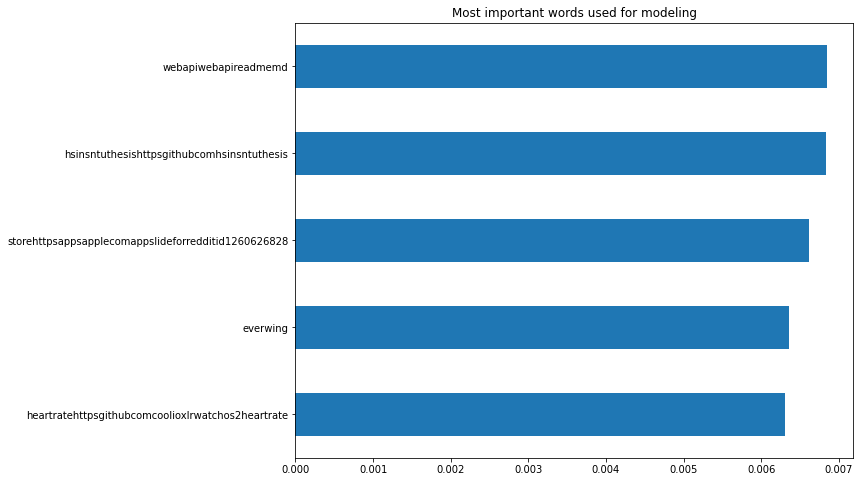

In [292]:
pd.Series(dict(zip(cv.get_feature_names(), rf.feature_importances_))).sort_values().tail(5).plot.barh(title = "Most important words used for modeling", figsize=(10, 8))

### Random Forest

In [293]:
data_rep = ["bag_of_words", "tf_idf", "bag_of_ngrams"]

for i in data_rep:
    X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing(i, "is_top_language")
    rf = RandomForestClassifier(random_state= 123, min_samples_leaf = 1, max_depth = 5).fit(X_train, y_train)
    score = rf.score(X_train, y_train)
    print(f"{i}, score = {score}")
    

bag_of_words, score = 0.591304347826087
tf_idf, score = 0.6956521739130435
bag_of_ngrams, score = 0.4260869565217391


We can see that the best alternative is to use tf_idf for this model

In [294]:
X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing("tf_idf", "is_top_language")

In [295]:
for i in range(1, 20):
    rf, y_pred = model.run_rf(X_train, y_train, 1, i)
    score = rf.score(X_train, y_train)
    validate_score = rf.score(X_validate, y_validate)
    print(f"Max_depth = {i}, accuracy_score = {score:.2f}. Diff = {(score - validate_score) / score:.2f}")

Max_depth = 1, accuracy_score = 0.39. Diff = 0.02
Max_depth = 2, accuracy_score = 0.43. Diff = 0.10
Max_depth = 3, accuracy_score = 0.52. Diff = 0.26
Max_depth = 4, accuracy_score = 0.59. Diff = 0.35
Max_depth = 5, accuracy_score = 0.70. Diff = 0.34
Max_depth = 6, accuracy_score = 0.71. Diff = 0.39
Max_depth = 7, accuracy_score = 0.76. Diff = 0.39
Max_depth = 8, accuracy_score = 0.83. Diff = 0.44
Max_depth = 9, accuracy_score = 0.87. Diff = 0.50
Max_depth = 10, accuracy_score = 0.90. Diff = 0.49
Max_depth = 11, accuracy_score = 0.90. Diff = 0.52
Max_depth = 12, accuracy_score = 0.92. Diff = 0.53
Max_depth = 13, accuracy_score = 0.93. Diff = 0.53
Max_depth = 14, accuracy_score = 0.95. Diff = 0.54
Max_depth = 15, accuracy_score = 0.97. Diff = 0.55
Max_depth = 16, accuracy_score = 0.98. Diff = 0.58
Max_depth = 17, accuracy_score = 0.98. Diff = 0.56
Max_depth = 18, accuracy_score = 0.98. Diff = 0.58
Max_depth = 19, accuracy_score = 0.98. Diff = 0.58


The best score, that doesn't overfit, is a max_depth of 2

In [296]:
rf, y_pred = model.run_rf(X_train, y_train, 1, 2)
predictions["random_forest"] = y_pred

In [297]:
accuracy_score, matrix, report = model.accuracy_report(rf, y_pred, y_train)
print(accuracy_score)
print(matrix)
report

Accuracy on dataset: 0.43
            C++  Java  JavaScript  Python  other
C++           0     0           0       0      9
Java          0     0           0       0     13
JavaScript    0     0           0       0     28
Python        0     0           0       4     16
other         0     0           0       0     45


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,C++,Java,JavaScript,Python,other,accuracy,macro avg,weighted avg
precision,0.0,0.0,0.0,1.000000,0.405405,0.426087,0.281081,0.332550
recall,0.0,0.0,0.0,0.200000,1.000000,0.426087,0.240000,0.426087
f1-score,0.0,0.0,0.0,0.333333,0.576923,0.426087,0.182051,0.283724
support,9.0,13.0,28.0,20.000000,45.000000,0.426087,115.000000,115.000000


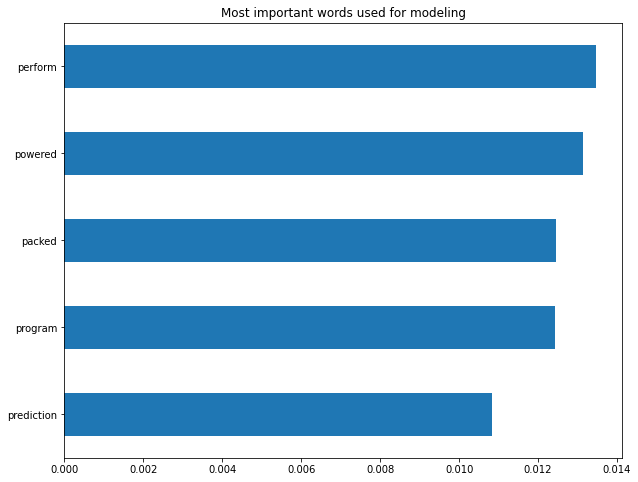

In [298]:
pd.Series(dict(zip(cv.get_feature_names(), rf.feature_importances_))).sort_values().tail(5).plot.barh(title = "Most important words used for modeling", figsize=(10, 8))

### KNN

In [299]:
data_rep = ["bag_of_words", "tf_idf", "bag_of_ngrams"]

for i in data_rep:
    X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing(i, "is_top_language")
    knn, y_pred = model.run_knn(X_train, y_train, 5)
    score = knn.score(X_train, y_train)
    print(f"{i}, score = {score}")
    

bag_of_words, score = 0.6782608695652174
tf_idf, score = 0.7304347826086957
bag_of_ngrams, score = 0.5652173913043478


In [300]:
for i in range(1, 20):
    knn, y_pred = model.run_knn(X_train, y_train, i)
    score = knn.score(X_train, y_train)
    validate_score = knn.score(X_validate, y_validate)
    print(f"Max_depth = {i}, accuracy_score = {score:.2f}. Diff = {(score - validate_score) / score:.2f}")

Max_depth = 1, accuracy_score = 1.00. Diff = 0.59
Max_depth = 2, accuracy_score = 0.48. Diff = 0.09
Max_depth = 3, accuracy_score = 0.63. Diff = 0.30
Max_depth = 4, accuracy_score = 0.97. Diff = 0.73
Max_depth = 5, accuracy_score = 0.57. Diff = 0.86
Max_depth = 6, accuracy_score = 0.62. Diff = 0.38
Max_depth = 7, accuracy_score = 0.76. Diff = 0.59
Max_depth = 8, accuracy_score = 0.81. Diff = 0.52
Max_depth = 9, accuracy_score = 0.75. Diff = 0.49
Max_depth = 10, accuracy_score = 0.41. Diff = 0.06
Max_depth = 11, accuracy_score = 0.40. Diff = 0.04
Max_depth = 12, accuracy_score = 0.40. Diff = 0.04
Max_depth = 13, accuracy_score = 0.40. Diff = 0.04
Max_depth = 14, accuracy_score = 0.40. Diff = 0.04
Max_depth = 15, accuracy_score = 0.40. Diff = 0.04
Max_depth = 16, accuracy_score = 0.40. Diff = 0.04
Max_depth = 17, accuracy_score = 0.39. Diff = 0.02
Max_depth = 18, accuracy_score = 0.39. Diff = 0.02
Max_depth = 19, accuracy_score = 0.39. Diff = 0.02


In [301]:
knn, y_pred = model.run_knn(X_train, y_train, 2)
predictions["knn"] = y_pred

In [302]:
accuracy_score, matrix, report = model.accuracy_report(knn, y_pred, y_train)
print(accuracy_score)
print(matrix)
report

Accuracy on dataset: 0.48
            C++  Java  JavaScript  Python  other
C++           9     0           0       0      0
Java          0    13           0       0      0
JavaScript    0     0          28       0      0
Python        0     0          18       2      0
other         1     0          41       0      3


,C++,Java,JavaScript,Python,other,accuracy,macro avg,weighted avg
precision,0.900000,1.0,0.321839,1.000000,1.000000,0.478261,0.844368,0.827056
recall,1.000000,1.0,1.000000,0.100000,0.066667,0.478261,0.633333,0.478261
f1-score,0.947368,1.0,0.486957,0.181818,0.125000,0.478261,0.548229,0.386282
support,9.000000,13.0,28.000000,20.000000,45.000000,0.478261,115.000000,115.000000


In [307]:
report = model.create_report(predictions.actual, predictions.decision_tree)

In [318]:
# How do the different models compare on accuracy?
print("Accuracy Scores")
print("---------------")
for i in range(predictions.shape[1]):
    report = model.create_report(predictions.actual, predictions.iloc[:,i])
    print(f'{predictions.columns[i].title()} = {report.accuracy[0]:.2f}')

Accuracy Scores
---------------
Actual = 1.00
Baseline = 0.39
Decision_Tree = 0.80
Random_Forest = 0.43
Knn = 0.48


Key take-aways:
* All models perform better than the baseline, which means implementation of machine learning algorithms for this particular project is an improvement.
* The best performing model is the `Decision Tree` classifier, with an accuracy of 80%
* Given that there is no way to quantify cost, and in this particular case neither recall nor precision are more or less important, we will focus on the general accuracy of the models (given that both metrics are used to calcualte accuracy).

# Evaluation

In [376]:
# Now we will see if the model is overfit

X_train, X_validate, X_test, y_train, y_validate, y_test = model.preprocessing("tf_idf", "is_top_language")
clf, y_pred = model.run_clf(X_train, y_train, 5)

In [332]:
clf.score(X_test, y_test)

0.6666666666666666

### Build a function that will take in a text of a README file, and tries to predict the programming language

In [461]:
def predict_readme_language(readme):
    df = model.acquire_data()
    df = model.prepare_data(df)

    tfidf = TfidfVectorizer()
    X = tfidf.fit_transform(df.readme_contents.apply(clean).apply(' '.join)) 
    y = df["is_top_language"]

    X_train, X_validate, X_test, y_train, y_validate, y_test = model.split_data(X, y)
    
    clf, y_pred = model.run_clf(X_train, y_train, 5)
    
    text = model.prepare_data(readme)
    
    X = tfidf.transform(text.readme_contents.apply(clean).apply(' '.join))
    
    prediction = clf.predict(X)
    
    return prediction

In [464]:
text = df.tail(5).head(1)

In [466]:
text

,repo,language,readme_contents,is_top_language
243,lodash/lodash,JavaScript,# lodash\n\n[Site](https://lodash.com/) |\n[Do...,JavaScript


In [473]:
prediction = predict_readme_language(text)
print(f"This language was likely written in {prediction[0]}")

This language was likely written in JavaScript


In [477]:
df = pd.read_json("data.json")

In [478]:
df.shape

(384, 3)